In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # for plotting

In [25]:
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # For regression model
from sklearn.metrics import mean_absolute_error, r2_score  # For evaluation metrics
from sklearn.preprocessing import OneHotEncoder # For encoding categorical variables
from sklearn.compose import ColumnTransformer # For transforming data
from sklearn.pipeline import Pipeline # For creating a machine learning pipeline
from sklearn.compose import make_column_transformer # For creating a column transformer

In [ ]:
# Lets load the dataset
data = pd.read_csv('Salary Data.csv')

In [ ]:
# Display the first few rows of the dataset, this will help us understand its structure.
print(data.head(10))

    Age  Gender Education Level              Job Title  Years of Experience  \
0  32.0    Male      Bachelor's      Software Engineer                  5.0   
1  28.0  Female        Master's           Data Analyst                  3.0   
2  45.0    Male             PhD         Senior Manager                 15.0   
3  36.0  Female      Bachelor's        Sales Associate                  7.0   
4  52.0    Male        Master's               Director                 20.0   
5  29.0    Male      Bachelor's      Marketing Analyst                  2.0   
6  42.0  Female        Master's        Product Manager                 12.0   
7  31.0    Male      Bachelor's          Sales Manager                  4.0   
8  26.0  Female      Bachelor's  Marketing Coordinator                  1.0   
9  38.0    Male             PhD       Senior Scientist                 10.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
5   55000.0  
6  120000.0  
7   80000.0  
8   

In [ ]:
# Here we are checking the unique values in the 'Education Level' column to understand the categories present.
data['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [13]:
# Drop rows with any null values from the DataFrame
data = data.dropna()

In [14]:
info = data.info()  # Get a concise summary of the DataFrame
print(info)


<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB
None


In [11]:
# Get detailed info on the dataset

# For character (object) columns: get all distinct values
char_cols = data.select_dtypes(include='object').columns
for col in char_cols:
    print(f"Distinct values in '{col}':")
    print(data[col].unique())
    print()

# For integer/float columns: group by unique values and count occurrences
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"Value counts for '{col}':")
    print(data[col].value_counts().sort_index())
    print()

Distinct values in 'Gender':
['Male' 'Female']

Distinct values in 'Education Level':
["Bachelor's" "Master's" 'PhD']

Distinct values in 'Job Title':
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Ma

In [16]:
# defining the target and features
# 'Salary' is the target variable for prediction and the rest are features
y = data["Salary"]
X = data[["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]]

In [26]:
categorical_features = ["Gender", "Education Level", "Job Title"]
numerical_features = ["Age", "Years of Experience"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), categorical_features),
    remainder="passthrough"  # keep numerical features as-is
)

In [27]:
#building the pipeline with linear regression model
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

In [28]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#Training the model and evaluating it
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\mehul\anaconda3\envs\pyenv\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel with Education Level:")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Model with Education Level:
Mean Absolute Error: 12226.502499113429
R^2 Score: 0.8029241078001148


In [31]:
X_test_copy = X_test.copy()
X_test_copy["Predicted Salary"] = y_pred
X_test_copy["Actual Salary"] = y_test.values
X_test_copy.to_csv("salary_predictions_with_education.csv", index=False)

In [ ]:
# Now we will drop the 'Education Level' column from the features to see how the model performs without it
X_no_edu = X.drop(columns=["Education Level"])

In [33]:
#Updating the categorical features list to exclude 'Education Level'
categorical_no_edu = ["Gender", "Job Title"]

In [34]:
preprocessor_no_edu = make_column_transformer(
    (OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore'), categorical_no_edu),
    remainder="passthrough"  # keep numerical features as-is
)

In [ ]:
# Building the pipeline without 'Education Level'
model_no_edu = Pipeline(steps=[
    ("preprocess", preprocessor_no_edu),
    ("regressor", LinearRegression())
])

In [37]:
# Splitting the dataset into training and testing sets without 'Education Level'
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_edu, y, test_size=0.2, random_state=42)

In [38]:
# Training and evaluating the model without 'Education Level'
model_no_edu.fit(X_train2, y_train2)
y_pred2 = model_no_edu.predict(X_test2)

# Evaluation metrics for the model without 'Education Level'
mae2 = mean_absolute_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

print("\nModel without Education Level:")
print(f"Mean Absolute Error: {mae2:.2f}")
print(f"R² Score: {r2_2:.4f}")


Model without Education Level:
Mean Absolute Error: 13121.32
R² Score: 0.7945


c:\Users\mehul\anaconda3\envs\pyenv\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
X_test2_copy = X_test2.copy()
X_test2_copy["Predicted Salary"] = y_pred2
X_test2_copy["Actual Salary"] = y_test2.values
X_test2_copy.to_csv("salary_predictions_without_education.csv", index=False)

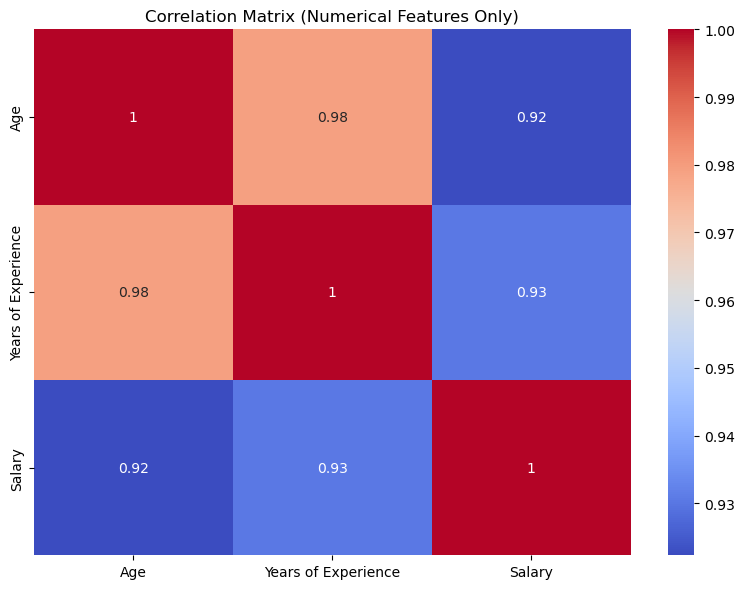

In [ ]:
# Visualizing the correlation matrix for numerical features only
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.tight_layout()
plt.show()

In [45]:
#Extracting feature names after encoding
encoded_feature_names = model.named_steps["preprocess"].get_feature_names_out()

In [46]:
# Combine names with coefficients
coefficients = model.named_steps["regressor"].coef_
feature_importance = pd.Series(coefficients, index=encoded_feature_names)
feature_importance = feature_importance.sort_values(key=abs, ascending=False)

In [ ]:
print("\nTop Influential Features (with Education):")
print(feature_importance.head(10))


Top Influential Features (with Education):
onehotencoder__Job Title_Chief Technology Officer     106226.008245
onehotencoder__Job Title_Chief Data Officer           105191.032055
onehotencoder__Job Title_VP of Finance                 82088.532218
onehotencoder__Job Title_VP of Operations              72088.532218
onehotencoder__Job Title_Operations Director           70754.820653
onehotencoder__Job Title_Director                      68559.225159
onehotencoder__Job Title_Director of Sales             62042.871760
onehotencoder__Job Title_Director of HR                59299.482325
onehotencoder__Job Title_Director of Marketing         57251.372563
onehotencoder__Job Title_Director of Human Capital     55678.854349
dtype: float64


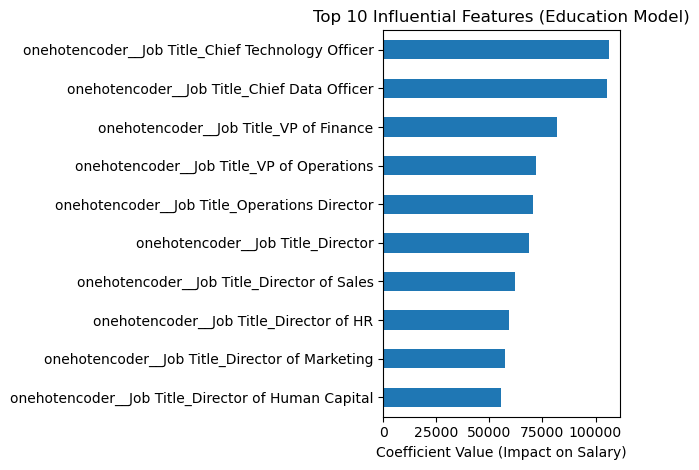

In [48]:
feature_importance.head(10).plot(kind="barh")
plt.title("Top 10 Influential Features (Education Model)")
plt.xlabel("Coefficient Value (Impact on Salary)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()